In [2]:
# Imports
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
from bs4 import BeautifulSoup 
#from tabulate import tabulate

In [3]:
#extract the data from the website
url = requests.get("https://www.fundsexplorer.com.br/ranking")

In [4]:
fii_bs4 = BeautifulSoup(url.text, "html.parser")

In [5]:
#find the table with a tag
fii_table = fii_bs4.findAll(attrs = {'id' : 'scroll-wrapper'})
table = fii_table[0].findAll('table')

In [6]:
fii_df = pd.read_html(str(fii_table[0]))[0]

In [7]:
#initial dataframe
fii_df

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,"R$ 2,12",3752.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 65.678.487,99","R$ 6,98",30.0,NaN,NaN,NaN,NaN,"56,00%",NaN,1
1,BZLI11,Títulos e Val. Mob.,"R$ 14,70",44041.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 431.325.803,06","R$ 10,67",138.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,"R$ 6,11",4050.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 27.305.951,24","R$ 13,89",44.0,NaN,NaN,NaN,NaN,"0,00%","100,00%",1
3,ALMI11,Lajes Corporativas,"R$ 891,00",21.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 249.632.973,43","R$ 2.245,37",40.0,NaN,NaN,NaN,NaN,"64,05%",NaN,1
4,PABY11,Híbrido,"R$ 8,30",13.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ -9.870.075,03","R$ -13,01",-64.0,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,RBLG11,Logística,"R$ 86,90",17.0,"R$ 0,80","0,92%","2,76%","5,46%","10,06%","0,92%",...,"R$ 66.897.594,99","R$ 104,50",83.0,"0,77%","1,72%","2,50%","3,30%","0,00%",NaN,1
278,QAGR11,Outros,"R$ 46,20",27057.0,"R$ 0,40","0,86%","2,51%","4,83%","9,36%","0,84%",...,"R$ 300.831.716,41","R$ 59,69",77.0,"0,65%","-0,03%","0,62%","1,87%",NaN,NaN,12
279,CRFF11,Títulos e Val. Mob.,"R$ 67,36",29.0,"R$ 0,63","0,96%","2,73%","5,00%","8,61%","0,91%",...,"R$ 59.827.386,69","R$ 86,70",78.0,"0,68%","-0,61%","0,06%","4,39%",NaN,NaN,0
280,CXRI11,Híbrido,"R$ 63,50",519.0,"R$ 0,64","1,01%","2,70%","5,01%","8,95%","0,90%",...,"R$ 132.926.744,20","R$ 84,36",75.0,"0,65%","-1,18%","-0,53%","2,62%",NaN,NaN,0


In [8]:
fii_df.columns.values

array(['Códigodo fundo', 'Setor', 'Preço Atual', 'Liquidez Diária',
       'Dividendo', 'DividendYield', 'DY (3M)Acumulado',
       'DY (6M)Acumulado', 'DY (12M)Acumulado', 'DY (3M)Média',
       'DY (6M)Média', 'DY (12M)Média', 'DY Ano', 'Variação Preço',
       'Rentab.Período', 'Rentab.Acumulada', 'PatrimônioLíq.', 'VPA',
       'P/VPA', 'DYPatrimonial', 'VariaçãoPatrimonial',
       'Rentab. Patr.no Período', 'Rentab. Patr.Acumulada',
       'VacânciaFísica', 'VacânciaFinanceira', 'QuantidadeAtivos'],
      dtype=object)

In [9]:
#rename the columns
fii_df.columns = ['ticker', 'Setor', 'price', 'liquidez',
       'Dividendo', 'DividendYield', 'DY (3M)Acumulado',
       'DY (6M)Acumulado', 'dy', 'DY (3M)Média',
       'DY (6M)Média', 'Dividenmediio', 'DY Ano', 'Variação Preço',
       'Rentab.Período', 'Rentab.Acumulada', 'PatrimônioLíq.', 'VPA',
       'pvpa', 'DYPatrimonial', 'VariaçãoPatrimonial',
       'Rentab. Patr.no Período', 'Rentab. Patr.Acumulada',
       'VacânciaFísica', 'VacânciaFinanceira', 'QuantidadeAtivos']

In [10]:
fii_df.columns.values

array(['ticker', 'Setor', 'price', 'liquidez', 'Dividendo',
       'DividendYield', 'DY (3M)Acumulado', 'DY (6M)Acumulado', 'dy',
       'DY (3M)Média', 'DY (6M)Média', 'Dividenmediio', 'DY Ano',
       'Variação Preço', 'Rentab.Período', 'Rentab.Acumulada',
       'PatrimônioLíq.', 'VPA', 'pvpa', 'DYPatrimonial',
       'VariaçãoPatrimonial', 'Rentab. Patr.no Período',
       'Rentab. Patr.Acumulada', 'VacânciaFísica', 'VacânciaFinanceira',
       'QuantidadeAtivos'], dtype=object)

In [11]:
#save a backup od the data
fii_back = fii_df.copy()

In [12]:
#select the columns needed for the test
test = fii_df[['ticker', 'price', 'dy', 'pvpa','liquidez']]

In [13]:
print("--> DATA:")
display(test.isnull().sum())

--> DATA:


ticker      0
price       8
dy          6
pvpa        8
liquidez    8
dtype: int64

In [14]:
#excludes the "nan" data
test = test[test['price'].notna()]
test = test[test['dy'].notna()]

In [15]:
print("--> DATA:")
display(test.isnull().sum())

--> DATA:


ticker      0
price       0
dy          0
pvpa        0
liquidez    0
dtype: int64

In [16]:
#classified the dataframe by dividend yeld from largest to smallest 
test = test.sort_values(['dy'], ascending=False)

In [17]:
test

,ticker,price,dy,pvpa,liquidez
176,GALG11,"R$ 91,53","9,98%",90.0,4194.0
57,MGFF11,"R$ 60,46","9,91%",79.0,16810.0
45,MAXR11,"R$ 78,30","9,91%",65.0,4275.0
240,SADI11,"R$ 90,65","9,89%",90.0,6795.0
153,CXCO11,"R$ 75,53","9,88%",78.0,1856.0
...,...,...,...,...,...
17,KNRE11,"R$ 0,91","0,00%",74.0,1627.0
129,BTRA11,"R$ 82,00","0,00%",79.0,7129.0
30,SRVD11,"R$ 8,38","0,00%",1123.0,9.0
89,VGIA11,"R$ 10,01","0,00%",105.0,152662.0


In [18]:
# excludes the "R$" unit from the data
unit = 'R$'
test['price'] = [sub.replace(unit, "").strip() for sub in test['price']]

In [19]:
test

,ticker,price,dy,pvpa,liquidez
176,GALG11,"91,53","9,98%",90.0,4194.0
57,MGFF11,"60,46","9,91%",79.0,16810.0
45,MAXR11,"78,30","9,91%",65.0,4275.0
240,SADI11,"90,65","9,89%",90.0,6795.0
153,CXCO11,"75,53","9,88%",78.0,1856.0
...,...,...,...,...,...
17,KNRE11,"0,91","0,00%",74.0,1627.0
129,BTRA11,"82,00","0,00%",79.0,7129.0
30,SRVD11,"8,38","0,00%",1123.0,9.0
89,VGIA11,"10,01","0,00%",105.0,152662.0


In [20]:
#view the types of the columns
test.dtypes

ticker       object
price        object
dy           object
pvpa        float64
liquidez    float64
dtype: object

In [21]:
#change the separator digit of "," for "."
test['price'] = test['price'].str.replace(',', '.')
test['price'] = pd.to_numeric(test['price'], errors='coerce')
test

,ticker,price,dy,pvpa,liquidez
176,GALG11,91.53,"9,98%",90.0,4194.0
57,MGFF11,60.46,"9,91%",79.0,16810.0
45,MAXR11,78.30,"9,91%",65.0,4275.0
240,SADI11,90.65,"9,89%",90.0,6795.0
153,CXCO11,75.53,"9,88%",78.0,1856.0
...,...,...,...,...,...
17,KNRE11,0.91,"0,00%",74.0,1627.0
129,BTRA11,82.00,"0,00%",79.0,7129.0
30,SRVD11,8.38,"0,00%",1123.0,9.0
89,VGIA11,10.01,"0,00%",105.0,152662.0


In [22]:
#excludes the "nan" data
test = test[test['price'].notna()]

In [23]:
#calculate the daily liquidity
test['lid2'] = test['price'] * test['liquidez']
test

C:\Users\AGE9\AppData\Local\Temp\ipykernel_8196\603845583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['lid2'] = test['price'] * test['liquidez']


,ticker,price,dy,pvpa,liquidez,lid2
176,GALG11,91.53,"9,98%",90.0,4194.0,383876.82
57,MGFF11,60.46,"9,91%",79.0,16810.0,1016332.60
45,MAXR11,78.30,"9,91%",65.0,4275.0,334732.50
240,SADI11,90.65,"9,89%",90.0,6795.0,615966.75
153,CXCO11,75.53,"9,88%",78.0,1856.0,140183.68
...,...,...,...,...,...,...
17,KNRE11,0.91,"0,00%",74.0,1627.0,1480.57
129,BTRA11,82.00,"0,00%",79.0,7129.0,584578.00
30,SRVD11,8.38,"0,00%",1123.0,9.0,75.42
89,VGIA11,10.01,"0,00%",105.0,152662.0,1528146.62


In [24]:
##classified the dataframe by daily liquidity from largest to smallest 
test = test.sort_values(['lid2'], ascending=False)

In [25]:
#reset the index
test.reset_index(inplace=True, drop=True)

In [26]:
#excludes the reits (fii) with daily liquidity less than R$ 200,000.00
indexNames = test[ (test['lid2'] <= 200000)].index
test.drop(indexNames , inplace=True)
test

,ticker,price,dy,pvpa,liquidez,lid2
0,KNIP11,98.30,"16,01%",101.0,170424.0,16752679.20
1,URPR11,108.19,"18,35%",104.0,75935.0,8215407.65
2,CPTS11,91.61,"12,95%",98.0,75581.0,6923975.41
3,HGLG11,161.40,"9,69%",108.0,40144.0,6479241.60
4,RECR11,100.48,"14,76%",105.0,59443.0,5972832.64
...,...,...,...,...,...,...
140,RFOF11,69.42,"10,55%",82.0,3060.0,212425.20
141,FIGS11,47.24,"7,61%",48.0,4467.0,211021.08
142,FLCR11,99.90,"15,24%",96.0,2107.0,210489.30
143,SHPH11,768.10,"5,12%",86.0,262.0,201242.20


In [27]:
#save the number of lines
ts = test.shape
ts = ts[0]

In [28]:
#classified the dataframe by dividend yeld from largest to smallest
test = test.sort_values(['dy'], ascending=False)
test.reset_index(inplace=True, drop=True)

In [29]:
b1 = [*range(0, ts, 1)]

In [30]:
#creates a ranking from highest to lowest dividend
test['b1'] = pd.Series(b1)

In [31]:
test

,ticker,price,dy,pvpa,liquidez,lid2,b1
0,GALG11,91.53,"9,98%",90.0,4194.0,383876.82,0
1,MGFF11,60.46,"9,91%",79.0,16810.0,1016332.60,1
2,MAXR11,78.30,"9,91%",65.0,4275.0,334732.50,2
3,SADI11,90.65,"9,89%",90.0,6795.0,615966.75,3
4,SDIL11,86.75,"9,87%",87.0,8241.0,714906.75,4
...,...,...,...,...,...,...,...
140,VGIA11,10.01,"0,00%",105.0,152662.0,1528146.62,140
141,RZAG11,9.97,"0,00%",104.0,108416.0,1080907.52,141
142,BPML11,61.00,"0,00%",45.0,5059.0,308599.00,142
143,BZLI11,14.70,"0,00%",138.0,44041.0,647402.70,143


In [32]:
#classified the dataframe by pvpa from largest to smallest
test = test.sort_values(['pvpa'], ascending=True)

In [33]:
test.reset_index(inplace=True, drop=True)

In [34]:
#creates a ranking from highest to lowest pvpa
b2 = [*range(0, ts, 1)]
test['b2'] = pd.Series(b2)

In [35]:
test

,ticker,price,dy,pvpa,liquidez,lid2,b1,b2
0,GSFI11,4.51,"0,03%",34.0,104885.0,473031.35,132,0
1,BPML11,61.00,"0,00%",45.0,5059.0,308599.00,142,1
2,FIGS11,47.24,"7,61%",48.0,4467.0,211021.08,44,2
3,FVPQ11,114.20,"7,07%",58.0,2835.0,323757.00,52,3
4,BRCR11,59.99,"8,13%",59.0,39761.0,2385262.39,35,4
...,...,...,...,...,...,...,...,...
140,ARCT11,107.28,"16,40%",107.0,29467.0,3161219.76,66,140
141,HGLG11,161.40,"9,69%",108.0,40144.0,6479241.60,8,141
142,ALZR11,116.74,"7,43%",108.0,9780.0,1141717.20,47,142
143,XPHT11,107.75,"4,61%",115.0,11041.0,1189667.75,61,143


In [36]:
#sum the dividend yeld rank with the pvpa rank
test = test.eval('Rank = b1 + b2')

In [37]:
#classified the dataframe by final rank from smallest to largest
test = test.sort_values(['Rank'], ascending=True)

In [38]:
test.reset_index(inplace=True, drop=True)

In [39]:
#select the top 10 reits (fii) to invest
indexNames = test[(test.index > 9)].index
test.drop(indexNames , inplace=True)

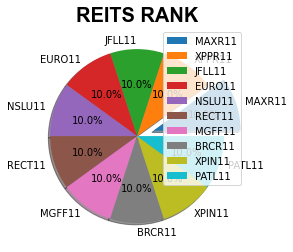

In [40]:
y = [10,10,10,10,10,10,10,10,10,10]
ml = test['ticker']
me = [0.2,0,0,0,0,0,0,0,0,0]
plt.pie(y, labels = ml, shadow=True, autopct='%1.1f%%', explode=me)
plt.title('REITS RANK',fontname="Arial",fontweight="bold", size=20)
plt.legend()

In [41]:
tts = test['ticker']+".SA"
print(tts)

0    MAXR11.SA
1    XPPR11.SA
2    JFLL11.SA
3    EURO11.SA
4    NSLU11.SA
5    RECT11.SA
6    MGFF11.SA
7    BRCR11.SA
8    XPIN11.SA
9    PATL11.SA
Name: ticker, dtype: object


In [51]:
def rent(c,j,t):
    print(c * (1+j)**t )

rent (c = 9.85, j = 0.1, t = 1)

10.835


In [47]:

data = yf.download("XFIX11.SA", period="1y")
dd = pd.DataFrame(data)
dd = dd.drop(columns=['Open', 'High', 'Low', 'Volume', 'Adj Close'])
d2 = dd['Close']
d2 = pd.DataFrame(d2)
d2

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2021-07-05,9.85
2021-07-06,9.87
2021-07-07,9.87
2021-07-08,9.87
2021-07-12,10.00
...,...
2022-06-29,9.95
2022-06-30,9.98
2022-07-01,9.93


[*********************100%***********************]  1 of 1 completed


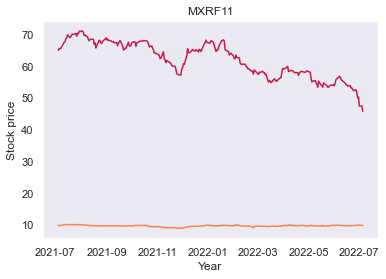

In [43]:
data = yf.download(tts[1], period="1y")
dfh = pd.DataFrame(data)
dfh = dfh.drop(columns=['Open', 'High', 'Low', 'Volume', 'Adj Close'])
d1 = dfh['Close']
sns.set_theme(style="darkgrid")
plt.title('MXRF11')
plt.plot(d1, color=[0.8, 0.1, 0.3])
plt.plot(d2, color=[1, 0.5, 0.3])
plt.grid(which='minor', alpha=0.2)
plt.grid(which='major', alpha=0.5)
plt.xticks(rotation=0)
plt.xlabel('Year')
plt.ylabel('Stock price')
plt.show()

In [44]:
d = "d"
for x in range (9):
    data = yf.download(tts[x], period="1y")
    dfh = pd.DataFrame(data)
    dfh = dfh.drop(columns=['Open', 'High', 'Low', 'Volume', 'Adj Close'])
    g = x
    d = d + str(g)
    print(d)
    d = dfh['Close']
    

[*********************100%***********************]  1 of 1 completed
d0
[*********************100%***********************]  1 of 1 completed


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('float64'), dtype('<U1')) -> None

In [ ]:

#y = data['Date']
#type (y)
sns.set_theme(style="darkgrid")
plt.title('MXRF11')
plt.plot(d0, color=[0.8, 0.1, 0.3])
plt.grid(which='minor', alpha=0.2)
plt.grid(which='major', alpha=0.5)
plt.xticks(rotation=0)
plt.xlabel('Year')
plt.ylabel('Stock price')
plt.show()